let's apply KNN classifier to a dataset.At first we are importing the necessary python packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv"

In [ ]:
headernames = ['seed1','seed2','seed3','seed4','seed5','seed6','seed7','class']

In [ ]:
data = pd.read_csv(path, names=headernames)
data


,seed1,seed2,seed3,seed4,seed5,seed6,seed7,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
data.shape

(210, 8)

In [ ]:
data.head()

,seed1,seed2,seed3,seed4,seed5,seed6,seed7,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


lets implement the preprocessing

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lets do the data scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now we are training the model with the help of the KNeighboursClassifier class of sklearn as follows

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

now we have to make the prediction

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

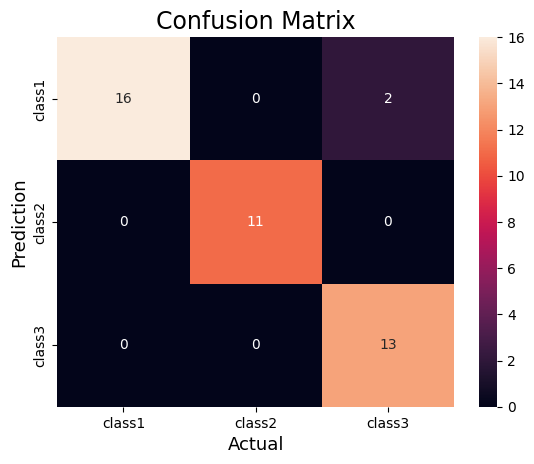

In [ ]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['class1','class2', 'class3'],
            yticklabels=['class1','class2', 'class3'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        11
           3       0.87      1.00      0.93        13

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.96        42
weighted avg       0.96      0.95      0.95        42

Accuracy: 0.9523809523809523


**REPORT**

Out of 18 class1 samples, 16 are correctly predicted as class1 and 2 are wrongly predicted as class2.

Out of 11 class2 samples, all are correctly predicted.

Out of 13 class3 samples, all are correctly predicted.

In [ ]:
#check the accuracy for k=8
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 8)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

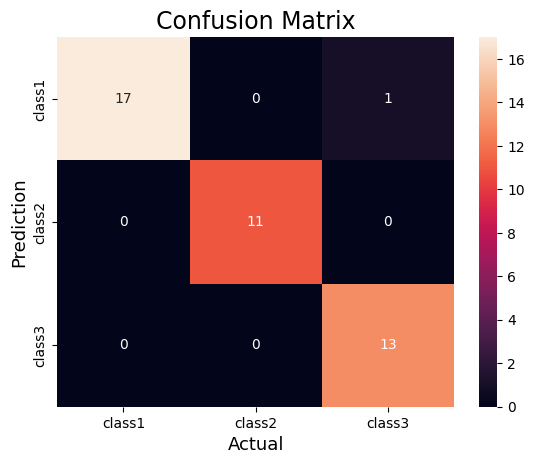

In [ ]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['class1','class2', 'class3'],
            yticklabels=['class1','class2', 'class3'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        11
           3       0.93      1.00      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Accuracy: 0.9761904761904762
